<a href="https://colab.research.google.com/github/cr7yash/Activity-Recognition-from-Single-Chest-Mounted-Accelerometer/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib sklearn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Reading the files
filenames = ['1.csv','2.csv','3.csv','4.csv','5.csv','1.csv','1.csv','1.csv','1.csv','1.csv','1.csv','1.csv','1.csv','1.csv','1.csv']

final_df = pd.DataFrame()

pId = 0
for pId, files in enumerate(filenames):
  df = pd.read_csv(files, index_col=None, header=None)
  df['User ID'] = pId + 1 
  final_df= final_df.append(df)

del final_df[0]
final_df.columns = ['X-acceleration', 'Y-acceleration', 'Z-acceleration', 'Activity ID', 'User ID']

In [8]:

#Basic information about the dataset
print("Dataset Info: ")
print(final_df.info())
print("Dataset Description: ")
print(final_df.iloc[:, 0:3].describe())

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2310055 entries, 0 to 162500
Data columns (total 5 columns):
 #   Column          Dtype
---  ------          -----
 0   X-acceleration  int64
 1   Y-acceleration  int64
 2   Z-acceleration  int64
 3   Activity ID     int64
 4   User ID         int64
dtypes: int64(5)
memory usage: 105.7 MB
None
Dataset Description: 
       X-acceleration  Y-acceleration  Z-acceleration
count    2.310055e+06    2.310055e+06    2.310055e+06
mean     1.929663e+03    2.374221e+03    2.022799e+03
std      6.744604e+01    4.783067e+01    7.403733e+01
min      1.094000e+03    2.000000e+00    2.000000e+00
25%      1.890000e+03    2.364000e+03    1.983000e+03
50%      1.910000e+03    2.379000e+03    2.009000e+03
75%      1.963000e+03    2.385000e+03    2.080000e+03
max      3.625000e+03    4.094000e+03    4.094000e+03


In [7]:
#Number of activities performed by each user 
activityPerUser = final_df['Activity ID'].value_counts()
print("Activity Per User :")
print(activityPerUser)
totalCountOfActivity = activityPerUser.sum()
print(totalCountOfActivity)

Activity Per User :
7    1088689
1     518792
4     393585
3     185562
5      48413
6      45377
2      29353
0        284
Name: Activity ID, dtype: int64
2310055


# Data Exploration

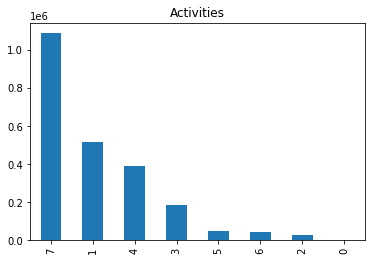

In [9]:
person = final_df.iloc[:, -2].value_counts()
person.plot(kind = 'bar', title = "Activities");

In [ ]:
test = pd.crosstab(index=final_acc.iloc[:, -1], columns=final_acc.iloc[:, -2])
test.plot(kind = "barh", stacked = True, figsize = (20, 5));

# Activities

In [ ]:
# Working at Computers 
expOne = final_acc[final_acc['Activity ID'] == 1]
expOne = expOne[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expOne = expOne[:40000]
axOne = expOne.plot(subplots = True, figsize = (15, 5))

# Observations

In [ ]:
# Standing Up, Walking and going up down stairs 
expTwo = final_acc[final_acc['Activity ID'] == 2]
expTwo = expTwo[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expTwo = expTwo[:40000]
axTwo = expTwo.plot(subplots = True, figsize = (15, 5))

In [ ]:
#Standing
expThree = final_acc[final_acc['Activity ID'] == 3]
expThree = expThree[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expThree = expThree[:40000]
axThree = expThree.plot(subplots = True, figsize=(15, 5))

In [ ]:
# Walking
expFour = final_acc[final_acc['Activity ID'] == 4]
expFour = expFour[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expFour = expFour[:4000]
axFour  = expFour.plot(subplots = True, figsize=(15, 5))

In [ ]:
# Going UP Down Stairs
expFive = final_acc[final_acc['Activity ID'] == 5]
expFive = expFive[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expFive = expFive[:40000]
axFive  = expFive.plot(subplots = True, figsize=(15, 5))

In [ ]:
# Walking and talking with someone
expSix = final_acc[final_acc['Activity ID'] == 6]
expSix = expSix[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expSix = expSix[:40000]
axSix  = expSix.plot(subplots = True, figsize=(15, 5))

In [ ]:
#Talking while standing
expSeven = final_acc[final_acc['Activity ID'] == 7]
expSeven = expSeven[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expSeven = expSeven[:4000]
axSeven  = expSeven.plot(subplots = True, figsize = (15, 5))

# Data Modelling

In [ ]:
from sklearn.model_selection import train_test_split #importing train_test_split library from sklearn
x = final_acc.iloc[:, 0:3] #Features (Independent Variables)
y = final_acc.iloc[:, -2] #Target Variables (Dependent Variables)
#Splitting the data into train and test, keeping 70% in train and rest 30% in test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30) 
print("X Train:\n", x_train.head(3), "\n")
print("Y Train:\n", y_train.head(3), "\n")
print("X Test (Unseen Data):\n", x_test.head(3), "\n")
print("Y Test (Unseen Data):\n", y_test.head(3), "\n")

Decision tree classifier

In [ ]:
from sklearn.utils import shuffle 
from sklearn.tree import DecisionTreeClassifier as dtc

new_Index = []
MaxScore = 0.0
columnNum = 3
randomIndex = shuffle(range(0,columnNum), random_state=0)


for i in range(0, columnNum):
    new_Index.append(randomIndex[i])
    newData = final_acc.iloc[:, new_Index]
    X_train, X_test, Y_train, Y_test = train_test_split(newData, y, test_size=0.4, random_state=0)
    classifier = dtc(criterion = 'gini', max_depth = 15)
    fit = classifier.fit(X_train, Y_train)
    cur_Score = classifier.score(X_test, Y_test)
    if cur_Score < MaxScore:
        new_Index.remove(randomIndex[i])
    else:
        MaxScore = cur_Score
        print("Score with " + str(len(new_Index)) + " selected features: " + str(cur_Score))


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score as acc
accur = []
accur2 = []
val = 0
val2 = 0
print("\n Criterion : Gini\n")
for i in range(1, 20):
    k = i+1
    decisionTreeClassifier = dtc(criterion = 'gini', max_depth = k)
    decisionTreeClassifier.fit(x_train, y_train)
    y_predict = decisionTreeClassifier.predict(x_test)
    a = acc(y_test, y_predict)*100
    if a > val:
        val = a
        ind = k
    accur.append(a)
    print("Accuracy for criterion GINI and Max_depth =", k, " is ", a, "%")

print("\nCriterion : Entropy \n")
for i in range(1, 20):
    k = i+1
    decisionTreeClassifier = dtc(criterion = 'entropy', max_depth = k)
    decisionTreeClassifier.fit(x_train, y_train)
    y_predict = decisionTreeClassifier.predict(x_test)
    a = acc(y_test, y_predict)*100
    if a > val2:
        val2 = a
        ind = k
    accur2.append(a)
    print("Accuracy for criterion ENTROPY and Max_depth =", k, " is ", a, "%")
    
print("\n")
if max(accur) > max(accur2):
    print("Criterion selected as GINI and max depth", ind, "will give us an accuracy score of ", max(accur))
    plt.figure(figsize=(16,5))
    plt.title("Model Accuracy Score: \n")
    plt.ylabel("Accuracy Scores: (in %)")
    plt.ylim(40, 100)
    plt.xlim(0, 25)
    plt.xlabel("Max_depth")
    plt.plot(range(1, 20), accur)
    plt.vlines(ind, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors = 'red');
else:
    print("Criterion selected as ENTROPY and max depth", ind, "will give us an accuracy score of ", max(accur2))
    plt.figure(figsize=(16,5))
    plt.title("Model Accuracy Score: \n")
    plt.ylabel("Accuracy Scores: (in %)")
    plt.ylim(40, 100)
    plt.xlim(0, 25)
    plt.xlabel("Max_depth")
    plt.plot(range(1, 20), accur2)
    plt.vlines(ind, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors = 'red');

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtc #importing Decision tree classifier from sklearn
from sklearn.metrics import classification_report as cr # classification report
from sklearn import metrics #importing metrics library to calculate the accuracy of the classifier model 
from sklearn.metrics import confusion_matrix

decision_tree = dtc(criterion = 'gini', max_depth = 15) #Normal decision tree will "Default Parameters"
decision_tree.fit(x_train, y_train) #fitting the x train and y train set into the decision tree model 
y_predicted = decision_tree.predict(x_test)

In [ ]:
#Accuracy Score for the above trained decision tree classifier with default parameter
print('Accuracy Score for Normal Decision Tree Classifier: ', (metrics.accuracy_score(y_test, y_predicted)*100))
#Printing the classification report for the normal decision tree
print("Classification Report for Normal Decision Tree :")
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
print(cr(y_test, y_predicted, digits = 3, target_names=target_names))
#Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:")
print(cm, "\n")

# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("Visualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation= 45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

Decision Tree With Kfold Cross Validation:


In [ ]:
from sklearn.model_selection import KFold as kf
from sklearn.model_selection import cross_val_score as cvs
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import cross_val_predict as cvp

decision_model = dtc() 
k_fold = kf(n_splits = 25, random_state = 0)
#Decision Tree Model is trained on the entire dataset
accuracyScores = cvs(decision_model, x, y, cv = k_fold) 
#Predicting the target values using the modified decision tree model on the unseen data
pred = cvp(decision_model, x_test, y_test)

In [ ]:
#Accuracy Score for tha above trained decision tree classifier
print("Mean accuracy for the Decision Tree Classifier(Cross Validation Score): ", accuracyScores.mean())
#Printing the classification report
print("Classification Report for Decision Tree(KFold Cross Validation) :")
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
print(cr(y_test, pred, digits = 3, target_names=target_names))
#Confusion Matrix
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)

# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("\nVisualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

 Decision Tree With KFold Cross Validation (Shuffle)¶

In [ ]:
ShuffK_fold = kf(n_splits = 25, random_state = 0, shuffle = True)
accuracyScores1 = cvs(decision_model, x, y, cv = ShuffK_fold) 
Strat_pred = cvp(dtc(), x_test, y_test)

In [ ]:
#Accuracy Score for tha above trained decision tree classifier
print("Accuracy Score for Normal Decision Tree Classifier: ", accuracyScores1.mean())
#Printing the classification report
print("Classification Report for Decision Tree:")
print(cr(y_test, Strat_pred, digits = 3))
#Confusion Matrix
cm = confusion_matrix(y_test, Strat_pred)
print("Confusion Matrix:\n", cm)

# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("\nVisualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

# KNN (KNearst Neighbor) Classifier:

In [ ]:
from sklearn.utils import shuffle 
from sklearn.neighbors import KNeighborsClassifier as knc

new_Index = []
MaxScore = 0.0
columnNum = 3
randomIndex = shuffle(range(0,columnNum), random_state=0)


for i in range(0, columnNum):
    new_Index.append(randomIndex[i])
    newData = final_acc.iloc[:, new_Index]
    X_train, X_test, Y_train, Y_test = train_test_split(newData, y, test_size=0.4, random_state=0)
    classifier = knc(5)
    fit = classifier.fit(X_train, Y_train)
    cur_Score = classifier.score(X_test, Y_test)
    if cur_Score < MaxScore:
        new_Index.remove(randomIndex[i])
    else:
        MaxScore = cur_Score
        print("Score with " + str(len(new_Index)) + " selected features: " + str(cur_Score))

Finding the optimum number of neighbours for the KNN Model


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score as acc
accur = []
optimum = 0
val3 = 0
for i in range(1, 25):
    k = i+1
    neighbors = knc(n_neighbors = k)
    neighbors.fit(x_train, y_train)
    y_predict = neighbors.predict(x_test)
    a = acc(y_test, y_predict)*100
    accur.append(a)
    if a > val3:
        val3 = a
        optimum = k
    print("Accuracy is ", a, "% for k value : ", k)

print("\n The optimum number of neighbors for this dataset is ", optimum)


plt.figure(figsize=(16,5))
plt.title("Model Accuracy Score: \n")
plt.ylabel("Accuracy Scores: (in %)")
plt.ylim(40, 100)
plt.xlim(0, 25)
plt.xlabel("Neighbors")
plt.plot(range(1, 25), accur)

KNN model using the optimum number of neighbors (Calculated Above)¶


In [ ]:
# Importing KNN Classifier 
from sklearn.neighbors import KNeighborsClassifier as knc 

knnModel = knc(25)
#Fitting the training and test set 
knnModel_1 = knnModel.fit(x_train, y_train) 
y_pred = knnModel_1.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import accuracy_score

print("Accuracy Score for Normal KNN: ", metrics.accuracy_score(y_test, y_pred))
print("Classification Report: \n", cr(y_test, y_pred))
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("\nVisualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

# KNN with KFold Cross Validation


In [ ]:
from sklearn.model_selection import KFold as kf
from sklearn.model_selection import cross_val_score as cvs
from sklearn.neighbors import KNeighborsClassifier as knc 
from sklearn.model_selection import cross_val_predict as cvp

Knn = knc() 
k_fold = kf(n_splits = 25, random_state = 0)
#KNN is trained on the entire dataset
accuracyScores = cvs(Knn, x, y, cv = k_fold) 
#Predicting the target values using the modified KNN model on the unseen data
pred = cvp(Knn, x_test, y_test)

In [ ]:
#Accuracy Score for tha above trained KNN classifier
print("Mean accuracy for the KNN Classifier(Cross Validation Score): ", accuracyScores.mean())
#Printing the classification report
print("Classification Report for KNN(KFold Cross Validation) :")
print(cr(y_test, pred, digits = 3))
#Confusion Matrix
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)

# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("\nVisualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

# KNN With KFold Cross Validation (Shuffle)


In [ ]:
SK_fold = kf(n_splits = 25, random_state = 0, shuffle = True)
accuracyScores1 = cvs(Knn, x, y, cv = SK_fold) 
Strat_pred1 = cvp(Knn, x_test, y_test)

In [ ]:
#Accuracy Score for tha above trained KNN classifier
print("Accuracy Score for the KNN Classifier(Cross Validation Score): ", accuracyScores1.mean())
#Printing the classification report
print("Classification Report for KNN(Stratified shuffel Cross Validation) :")
print(cr(y_test, Strat_pred, digits = 3))
#Confusion Matrix
cm = confusion_matrix(y_test, Strat_pred1)
print("Confusion Matrix:\n", cm)

# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("\nVisualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

# **Conclusion**:

From the above classification models, it is evident that KNN (K-Nearst Neighbor) has the best accuracy overall i.e. 72%; whereas the accuracy score for the decision tree is somewhere around 65%. Therefore, for the "Activity Recognition from Single Chest-Mounted Accelerometer" dataset KNN classification model can be consdered to recognise the given activity. However, in the dataset, there were a lot of ambiguty, which had to be mitigated.